<a href="https://colab.research.google.com/github/RonnyGuevara/Digital-image-processing/blob/main/PT3/Pr%C3%A1ctica_3_1_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 3:  Aritmética de pixeles

##Presentado por: Ronny Guevara

## Objetivo General
Clasificación de las operaciones aritméticas que combinan 2 imágenes en el espacio RGB e YIQ
## Objetivos Específicos
*   Conocer las librerías imageio, numpy y matplotlib.pyplot 
*   Conversión de espacios RGB y YIQ 
*   Presentación de resultados de las operaciones aritméticas

## Descripción del práctico:
Las actividades son:

*   Selección de las imágenes 
*   Operaciones aritméticas de las imágenes:    
  *   Espacio RGB:
      *   Suma: clampeada y promediada
      *   Resta: clampeada y promediada
  *   Espacio YIQ:
      *   Suma: clampeada y promediada
      *   Resta: clampeada y promediada
      *   if-ligther
      *   if-darker
*   Visualización de resultados

#### 1. Importación de librerías

In [1213]:
import imageio as io
import numpy as np
import os
import matplotlib.pyplot as plt

####2. Funciones Básicas


In [1214]:
#Función que permite leer un imagen sin limitación de UNIT8
def get_image(dir):
  image = io.imread(dir)
  image = image.astype(np.int)
  return image

#Función que permite plotear la imagen
def plot_image(img, cmap=None):
  titles=['Image 1', 'Image 2', f"Final image, {str(Arithmetic_Operation)}, {str(Type)}"]
  images=[image, image2, img]
  plt.figure(figsize=(15,15)) 
  plt.tight_layout()
  for i in range (3):
    plt.subplot(1,3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([]) 
  plt.show()
  
#Función que permite plotear la imagen
def plot2_image(image,Imagen, cmap=None):
  plt.figure(figsize=(100,100)) 
  plt.figure()
  plt.title(Imagen)
  plt.imshow(image,cmap=cmap)
  plt.colorbar()
  plt.grid(False)
  plt.show()

# Descomponer la imagen en sus compomentes RGB
def image_to_rgb(image):
  r = image[:,:,0]
  g = image[:,:,1]
  b = image[:,:,2]
  return r, g, b

# Descomponer la imagen en sus compomentes YIQ
def image_to_yiq(image):
  y = image[:,:,0]
  i = image[:,:,1]
  q = image[:,:,2]
  return y, i, q

#Construcción de la imagen a partir de las componentes RGB
def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

#Construcción de la imagen a partir de las componentes YIQ
def yiq_to_image(y,i,q):
  Shape = y.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = y
  im_out[:,:,1] = i
  im_out[:,:,2] = q
  return im_out.astype(np.float64)

#Información de la imagen
def image_info(image):
  print('This image is', image.dtype)
  print('with dimensions', image.shape)

#Normalización de las imagenes
def image_norm(image, image2):
  norm=image.astype(np.float64)/255
  norm2=image2.astype(np.float64)/255
  return norm,norm2

#Conversión RGB2YIQ
def image_RGB2YIQ(image, image2):
  matrixYIQ=np.array([[0.299,0.587,0.144],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
  YIQ=np.dot(image,matrixYIQ)
  YIQ2=np.dot(image2,matrixYIQ)  
  return YIQ, YIQ2

#Conversión YIQ2RGB
def image_YIQ2RGB(image):
  matrixRGB=np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
  RGB=np.dot(image,matrixRGB)
  RGB=RGB.clip(0,1)*255
  RGB=RGB.astype(np.uint8)
  return RGB

#Copia de la imagen Original
def image_copy(image, image2):
  work_image=np.copy(image)
  work_image2=np.copy(image2) 
  return work_image,work_image2 

#Guardar la imagen resultante 
def save_image(image):
  io.imwrite('/content/drive/MyDrive/Colab Notebooks/imagen_final.jpg',(image).astype(np.uint8))

####2. Funciones operacionales

In [1215]:
#Suma campleada en RGB
def RGB_addC_image(r,g,b,r2,g2,b2):
  sumaR = np.clip(r+r2, 0, 255)
  sumaG = np.clip(g+g2, 0, 255)
  sumaB = np.clip(b+b2, 0, 255)
  return sumaR, sumaG, sumaB

#Suma promediada en RGB
def RGB_addP_image(r,g,b,r2,g2,b2):
  sumaR = np.clip((r+r2)/2, 0, 255)
  sumaG = np.clip((g+g2)/2, 0, 255)
  sumaB = np.clip((b+b2)/2, 0, 255)
  return sumaR, sumaG, sumaB

#Resta campleada en RGB
def RGB_subC_image(r,g,b,r2,g2,b2):
  restaR = np.clip(r-r2, 0, 255)
  restaG = np.clip(g-g2, 0, 255)
  restaB = np.clip(b-b2, 0, 255)
  return restaR, restaG, restaB

#Resta promediada en RGB
def RGB_subP_image(r,g,b,r2,g2,b2):
  restaR = np.clip(127+(r-r2)/2, -255, 255)
  restaG = np.clip(127+(g-g2)/2, -255, 255)
  restaB = np.clip(127+(b-b2)/2, -255, 255)
  return restaR, restaG, restaB

#Suma campleada en YIQ
def YIQ_addC_image(y,i,q,y2,i2,q2):
  sumaY = np.clip(y+y2, 0, 1)
  sumaI = np.clip((((y*i)+(y2*i2))/(y+y2)), -0.5957 , 0.5957)
  sumaQ = np.clip((((y*q)+(y2*q2))/(y+y2)),-0.5226 , 0.5226)
  return sumaY, sumaI, sumaQ

#Suma promediada en YIQ
def YIQ_addP_image(y,i,q,y2,i2,q2):
  sumaY = np.clip((y+y2)/2, 0, 1)
  sumaI = np.clip(((((y*i)+(y2*i2))/(y+y2))/2), -0.5957 , 0.5957)
  sumaQ = np.clip(((((y*q)+(y2*q2))/(y+y2))/2),-0.5226 , 0.5226)
  return sumaY, sumaI, sumaQ

#Resta campleada en YIQ
def YIQ_subC_image(y,i,q,y2,i2,q2):
  restaY = np.clip(y-y2, 0, 1)
  restaI = np.clip((((y*i)-(y2*i2))/(y+y2)), -0.5957 , 0.5957)
  restaQ = np.clip((((y*q)-(y2*q2))/(y+y2)),-0.5226 , 0.5226)
  return restaY, restaI, restaQ

#Resta promediada en YIQ
def YIQ_subP_image(y,i,q,y2,i2,q2):
  restaY = np.clip((y-y2)/2, 0, 1)
  restaI = np.clip(((((y*i)-(y2*i2))/(y+y2))/2), -0.5957 , 0.5957)
  restaQ = np.clip(((((y*q)-(y2*q2))/(y+y2))/2),-0.5226 , 0.5226)
  return restaY, restaI, restaQ

#if_ligther
def YIQ_if_ligther_image(y,i,q,y2,i2,q2):
  for ln in range(lng):
    for wid in range(width):
      if y[ln,wid]>=y2[ln,wid]:
         y[ln,wid]=y[ln,wid]
         i[ln,wid]=i[ln,wid]
         q[ln,wid]=q[ln,wid]
      else:
        y[ln,wid]=y2[ln,wid]
        i[ln,wid]=i2[ln,wid]
        q[ln,wid]=q2[ln,wid]
  return y, i, q

#if_darker
def YIQ_if_darker_image(y,i,q,y2,i2,q2):
  for ln in range(lng):
    for wid in range(width):
      if y[ln,wid]<=y2[ln,wid]:
        y[ln,wid]=y[ln,wid]
        i[ln,wid]=i[ln,wid]
        q[ln,wid]=q[ln,wid]
      else:
          y[ln,wid]=y2[ln,wid]
          i[ln,wid]=i2[ln,wid]
          q[ln,wid]=q2[ln,wid]
  return y, i, q

####3. Drive en el trabajo
Incluido el drive en el trabajo se procede a leer las imagenes, permitiendo al usuario seleccionar la imagen que desee.

In [1216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 7200x7200 with 0 Axes>

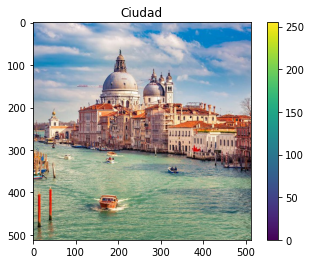

In [1217]:
#@title Selecciona primera imagen { run: "auto" }
Loro='/content/drive/MyDrive/Colab Notebooks/loro.jpg'
Ciudad='/content/drive/MyDrive/Colab Notebooks/Ciudad.jpg'
SistemaSolar='/content/drive/MyDrive/Colab Notebooks/SisSolar.jpg'
Imagen = 'Ciudad' #@param ["Loro", "Ciudad", "SistemaSolar"]

if Imagen == 'Loro':
  image = get_image(Loro)
  plot2_image(image, 'Loro')
elif Imagen == 'Ciudad':
  image = get_image(Ciudad)
  plot2_image(image, 'Ciudad')
elif Imagen == 'SistemaSolar':
  image = get_image(SistemaSolar)
  plot2_image(image, 'SistemaSolar')

<Figure size 7200x7200 with 0 Axes>

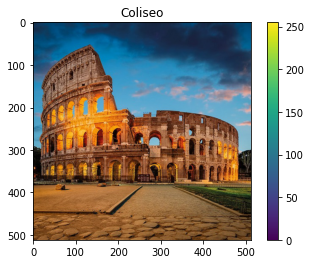

In [1218]:
#@title Selecciona la segunda imagen { run: "auto" }
Coliseo='/content/drive/MyDrive/Colab Notebooks/Coliseo.jpg'
Isla='/content/drive/MyDrive/Colab Notebooks/Isla.jpg'
Selva='/content/drive/MyDrive/Colab Notebooks/Selva.jpg'
Imagen2 = 'Coliseo' #@param ["Coliseo", "Isla", "Selva"]

if Imagen2 == 'Coliseo':
  image2 = get_image(Coliseo)
  plot2_image(image2, 'Coliseo')
elif Imagen2 == 'Isla':
  image2 = get_image(Isla)
  plot2_image(image2, 'Isla')
elif Imagen2 == 'Selva':
  image2 = get_image(Selva)
  plot2_image(image2, 'Selva')

####4. Visualización individual de las operaciones aritméticas

In [1219]:
#Proceso de copia de imagenes y visualización de información
work_image, work_image2=image_copy(image, image2)
image_info(image)
image_info(image2)

This image is int64
with dimensions (512, 512, 3)
This image is int64
with dimensions (512, 512, 3)


<Figure size 7200x7200 with 0 Axes>

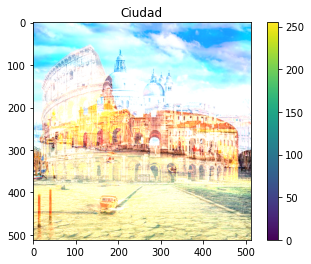

In [1220]:
#Suma Campleada en el espacio RGB
r, g, b = image_to_rgb(work_image)
r2, g2, b2 = image_to_rgb(work_image2)
R, G, B = RGB_addC_image(r,g,b,r2,g2,b2)
final_image=rgb_to_image(R,G,B)
plot2_image(final_image,Imagen,cmap=None)

<Figure size 7200x7200 with 0 Axes>

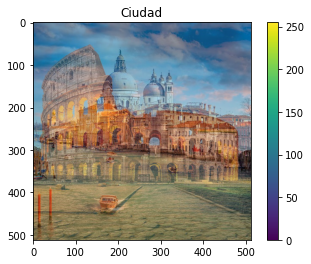

In [1221]:
#Suma Promediada en el espacio RGB 
r, g, b = image_to_rgb(work_image)
r2, g2, b2 = image_to_rgb(work_image2)
R, G, B = RGB_addP_image(r,g,b,r2,g2,b2)
Image11=rgb_to_image(R, G, B)
plot2_image(Image11,Imagen,cmap=None)

<Figure size 7200x7200 with 0 Axes>

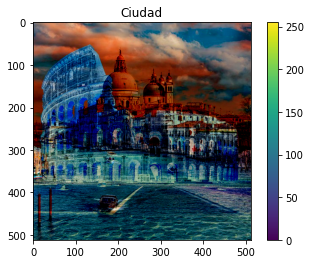

In [1222]:
#Resta Campleada en el espacio RBG
r, g, b = image_to_rgb(work_image)
r2, g2, b2 = image_to_rgb(work_image2)
R, G, B = RGB_subC_image(r,g,b,r2,g2,b2)
final_image=rgb_to_image(R,G,B)
plot2_image(final_image,Imagen,cmap=None)

<Figure size 7200x7200 with 0 Axes>

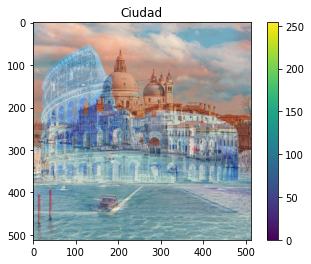

In [1223]:
#Resta Promediada en el espacio RGB
r, g, b = image_to_rgb(work_image)
r2, g2, b2 = image_to_rgb(work_image2)
R, G, B = RGB_subP_image(r,g,b,r2,g2,b2)
final_image=rgb_to_image(R,G,B)
plot2_image(final_image,Imagen,cmap=None)

In [1224]:
#Normalización de la imagen y conversión del espacio RGB a YIQ
work_image, work_image2=image_norm(work_image, work_image2)
YIQ, YIQ2=image_RGB2YIQ(work_image,work_image2)

<Figure size 7200x7200 with 0 Axes>

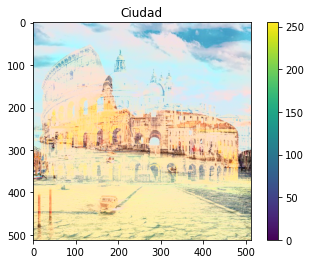

In [1225]:
#Suma campleada en el espacio YIQ
y, i, q=image_to_yiq(YIQ)
y2, i2, q2=image_to_yiq(YIQ2)
Y, I, Q = YIQ_addC_image(y,i,q,y2,i2,q2)
final_image=yiq_to_image(Y,I,Q)
final_image=image_YIQ2RGB(final_image)
plot2_image(final_image,Imagen,cmap=None)

<Figure size 7200x7200 with 0 Axes>

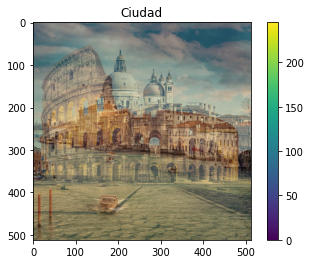

In [1226]:
#Suma promediada en el espacio YIQ
y, i, q=image_to_yiq(YIQ)
y2, i2, q2=image_to_yiq(YIQ2)
Y, I, Q = YIQ_addP_image(y,i,q,y2,i2,q2)
final_image=yiq_to_image(Y,I,Q)
final_image=image_YIQ2RGB(final_image)
plot2_image(final_image,Imagen,cmap=None)

<Figure size 7200x7200 with 0 Axes>

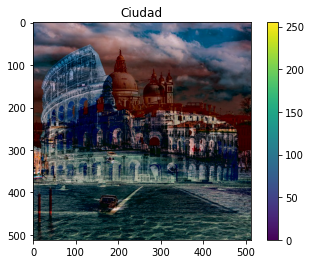

In [1227]:
#Resta campleada en el espacio YIQ
y, i, q=image_to_yiq(YIQ)
y2, i2, q2=image_to_yiq(YIQ2)
Y, I, Q = YIQ_subC_image(y,i,q,y2,i2,q2)
final_image=yiq_to_image(Y,I,Q)
final_image=image_YIQ2RGB(final_image)
plot2_image(final_image,Imagen,cmap=None)

<Figure size 7200x7200 with 0 Axes>

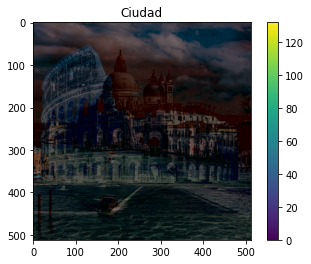

In [1228]:
#Resta promediada en el espacio YIQ
y, i, q=image_to_yiq(YIQ)
y2, i2, q2=image_to_yiq(YIQ2)
Y, I, Q = YIQ_subP_image(y,i,q,y2,i2,q2)
final_image=yiq_to_image(Y,I,Q)
final_image=image_YIQ2RGB(final_image)
plot2_image(final_image,Imagen,cmap=None)

<Figure size 7200x7200 with 0 Axes>

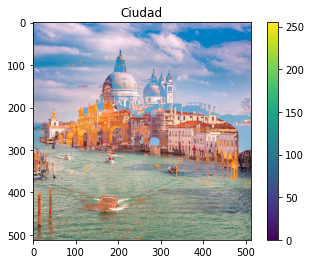

In [1229]:
#If_ligther en el espacio YIQ
y, i, q=image_to_yiq(YIQ)
y2, i2, q2=image_to_yiq(YIQ2)
Y, I, Q = YIQ_if_ligther_image(y,i,q,y2,i2,q2)
final_image=yiq_to_image(Y,I,Q)
final_image=image_YIQ2RGB(final_image)
plot2_image(final_image,Imagen,cmap=None)

<Figure size 7200x7200 with 0 Axes>

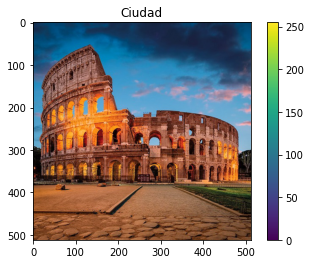

In [1230]:
#If_darker en el espacio YIQ
y, i, q=image_to_yiq(YIQ)
y2, i2, q2=image_to_yiq(YIQ2)
Y, I, Q = YIQ_if_darker_image(y,i,q,y2,i2,q2)
final_image=yiq_to_image(Y,I,Q)
final_image=image_YIQ2RGB(final_image)
plot2_image(final_image,Imagen,cmap=None)

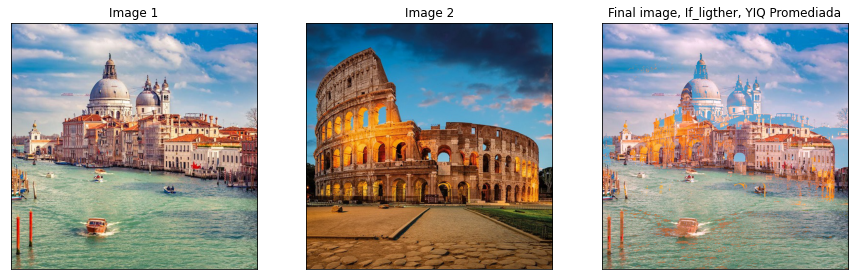

In [1231]:
#@title Resultados { run: "auto" }
Arithmetic_Operation = 'If_ligther' #@param ["Add", "Subtract","If_ligther", "If_darker"]
Type = 'YIQ Promediada' #@param ["RGB Campleada", "RGB Promediada","YIQ Campleada", "YIQ Promediada"] {allow-input: true}
if Arithmetic_Operation == 'Add':
  if Type == 'RGB Campleada':
    work_image, work_image2=image_copy(image, image2)
    r, g, b = image_to_rgb(work_image)
    r2, g2, b2 = image_to_rgb(work_image2)
    R, G, B = RGB_addC_image(r,g,b,r2,g2,b2)
    final_image=rgb_to_image(R,G,B)
    plot_image(final_image,cmap=None)
    save_image(final_image)
  elif Type == 'RGB Promediada':
    work_image, work_image2=image_copy(image, image2)
    r, g, b = image_to_rgb(work_image)
    r2, g2, b2 = image_to_rgb(work_image2)
    R, G, B = RGB_addP_image(r,g,b,r2,g2,b2)
    final_image=rgb_to_image(R, G, B)
    plot_image(final_image,cmap=None)
    save_image(final_image)
  elif Type == 'YIQ Campleada':
    work_image, work_image2=image_copy(image, image2)
    work_image, work_image2=image_norm(work_image, work_image2)
    YIQ, YIQ2=image_RGB2YIQ(work_image,work_image2)
    y, i, q=image_to_yiq(YIQ)
    y2, i2, q2=image_to_yiq(YIQ2)
    Y, I, Q = YIQ_addC_image(y,i,q,y2,i2,q2)
    final_image=yiq_to_image(Y,I,Q)
    final_image=image_YIQ2RGB(final_image)
    plot_image(final_image,cmap=None)
    save_image(final_image)
  elif Type == 'YIQ Promediada':
    work_image, work_image2=image_copy(image, image2)
    work_image, work_image2=image_norm(work_image, work_image2)
    YIQ, YIQ2=image_RGB2YIQ(work_image,work_image2)
    y, i, q=image_to_yiq(YIQ)
    y2, i2, q2=image_to_yiq(YIQ2)
    Y, I, Q = YIQ_addP_image(y,i,q,y2,i2,q2)
    final_image=yiq_to_image(Y,I,Q)
    final_image=image_YIQ2RGB(final_image)
    plot_image(final_image,cmap=None)
    save_image(final_image)  
elif Arithmetic_Operation == 'Subtract':
  if Type == 'RGB Campleada':
    work_image, work_image2=image_copy(image, image2)
    r, g, b = image_to_rgb(work_image)
    r2, g2, b2 = image_to_rgb(work_image2)
    R, G, B = RGB_subC_image(r,g,b,r2,g2,b2)
    final_image=rgb_to_image(R,G,B)
    plot_image(final_image,cmap=None)
    save_image(final_image)
  elif Type == 'RGB Promediada':
    work_image, work_image2=image_copy(image, image2)
    r, g, b = image_to_rgb(work_image)
    r2, g2, b2 = image_to_rgb(work_image2)
    R, G, B = RGB_subP_image(r,g,b,r2,g2,b2)
    final_image=rgb_to_image(R,G,B)
    plot_image(final_image,cmap=None)
    save_image(final_image)
  elif Type == 'YIQ Campleada':
    work_image, work_image2=image_copy(image, image2)
    work_image, work_image2=image_norm(work_image, work_image2)
    YIQ, YIQ2=image_RGB2YIQ(work_image,work_image2)
    y, i, q=image_to_yiq(YIQ)
    y2, i2, q2=image_to_yiq(YIQ2)
    Y, I, Q = YIQ_subC_image(y,i,q,y2,i2,q2)
    final_image=yiq_to_image(Y,I,Q)
    final_image=image_YIQ2RGB(final_image)
    plot_image(final_image,cmap=None)
    save_image(final_image)
  elif Type == 'YIQ Promediada':
    work_image, work_image2=image_copy(image, image2)
    work_image, work_image2=image_norm(work_image, work_image2)
    YIQ, YIQ2=image_RGB2YIQ(work_image,work_image2)
    y, i, q=image_to_yiq(YIQ)
    y2, i2, q2=image_to_yiq(YIQ2)
    Y, I, Q = YIQ_subP_image(y,i,q,y2,i2,q2)
    final_image=yiq_to_image(Y,I,Q)
    final_image=image_YIQ2RGB(final_image)
    plot_image(final_image,cmap=None)
    save_image(final_image)
elif Arithmetic_Operation == 'If_ligther':
    work_image, work_image2=image_copy(image, image2)
    work_image, work_image2=image_norm(work_image, work_image2)
    YIQ, YIQ2=image_RGB2YIQ(work_image,work_image2)
    y, i, q=image_to_yiq(YIQ)
    y2, i2, q2=image_to_yiq(YIQ2)
    Y, I, Q = YIQ_if_ligther_image(y,i,q,y2,i2,q2)
    final_image=yiq_to_image(Y,I,Q)
    final_image=image_YIQ2RGB(final_image)
    plot_image(final_image,cmap=None)
    save_image(final_image)
elif Arithmetic_Operation == 'If_darker':
    work_image, work_image2=image_copy(image, image2)
    work_image, work_image2=image_norm(work_image, work_image2)
    YIQ, YIQ2=image_RGB2YIQ(work_image,work_image2)
    y, i, q=image_to_yiq(YIQ)
    y2, i2, q2=image_to_yiq(YIQ2)
    Y, I, Q = YIQ_if_darker_image(y,i,q,y2,i2,q2)
    final_image=yiq_to_image(Y,I,Q)
    final_image=image_YIQ2RGB(final_image)
    plot_image(final_image,cmap=None)
    save_image(final_image)

####5. Análisis de los resultados:

*   Las operaciones if_lighter e if_darker deben ser realizadas en el espacio YIQ debido a que el resultado es una elección del pixel de la imagen A o B siempre que cumplan la condicional de la operación. Es erróneo aplicar estas operaciones en el espacio RGB.
*   Se debe tomar en consideración el formato de lectura de la imagen a la hora de editarlas y guardarlas, si bien en el espacio RGB se trabaja con datos tipo Enteros sin restricción, estos deben ser convertidos a datos flotantes para trabajar en el espacio YIQ.
*   Como resultado final del práctico, la interacción con el usuario permite la selección de la operación aritmética y tipo de operación (espacio cromático), se muestran las 2 imágenes elegidas por el usuario y la imagen resultante de la operación seleccionada, posterior la imagen resultante es guardada en el Drive como una imagen nueva.





